# Predicting heart disease using machine learning

## 1. Problem Definition
* Given clinical parameters about patients, predict whether or not they have heart disease

## 2. Data
* The data obtained from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/45/heart+disease) which also available in Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

## 3. Evaluation
* If able to reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, pursue the project.

## 4. Features
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defectattribute)

## Preparing the tools

pandas, matplotlib and numpy for data analysis and manipulation

In [1]:
# Exploratory data analysis and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

## Load data

In [2]:
df = pd.read_csv("dataset/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we trat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

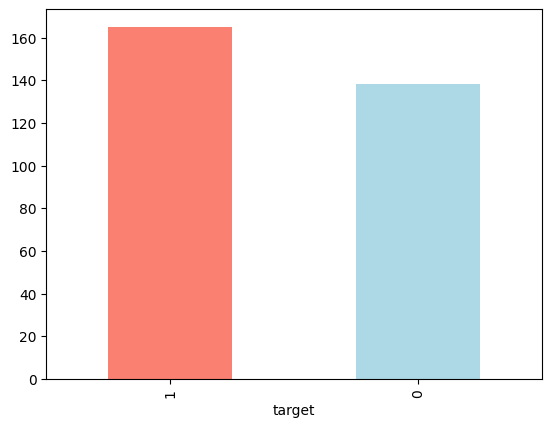

In [6]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Sex vs Target

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

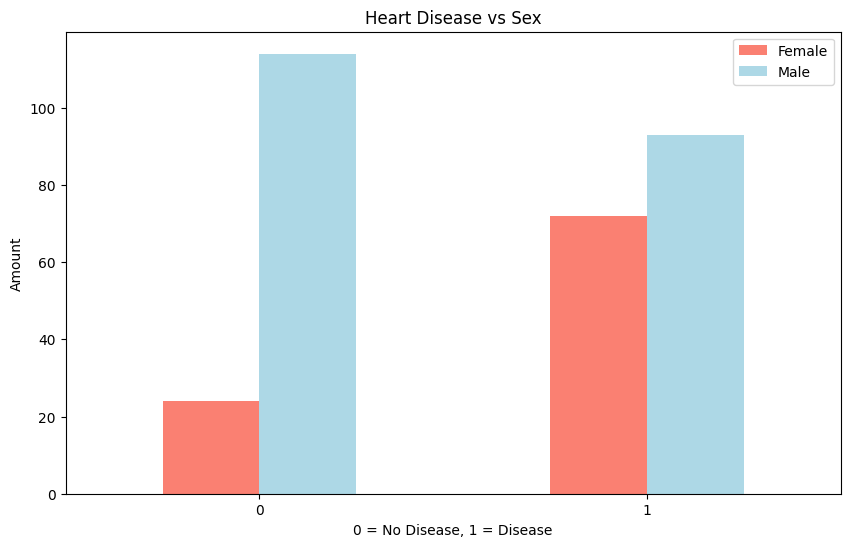

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [13]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Thalach

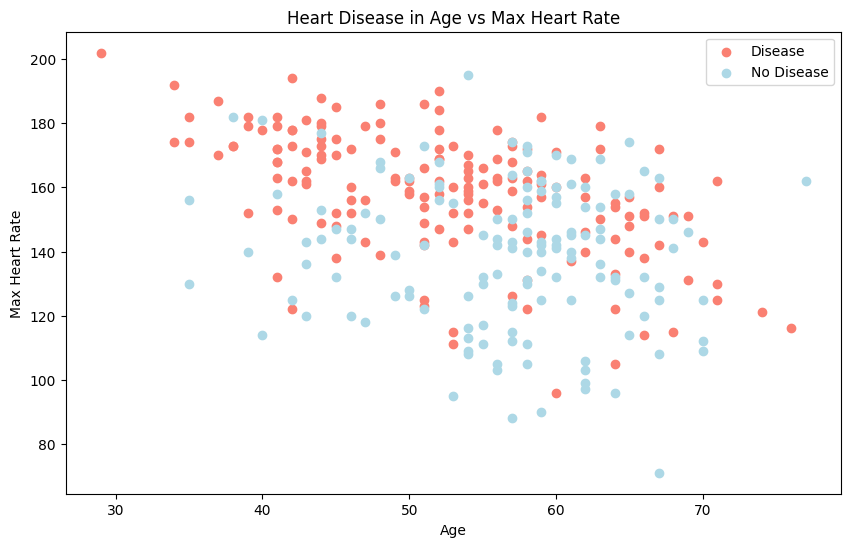

In [14]:
plt.figure(figsize=(10, 6))

# scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon")

# scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue")

plt.title("Heart Disease in Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

<Axes: ylabel='Frequency'>

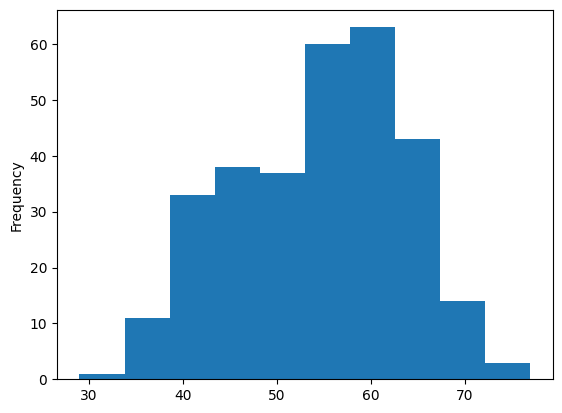

In [15]:
df.age.plot.hist()

### Chest pain type vs target

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

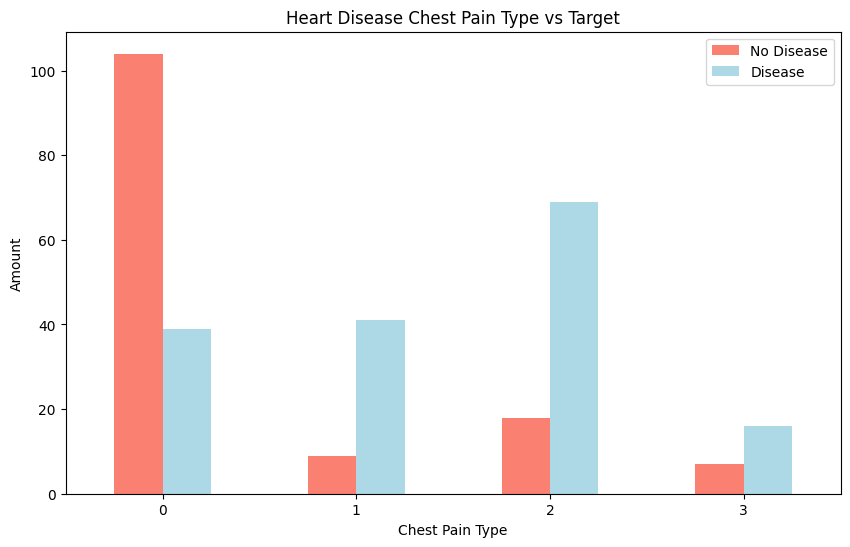

In [17]:
pd.crosstab(df.cp, df.target).plot.bar(figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Chest Pain Type vs Target")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [18]:
# correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


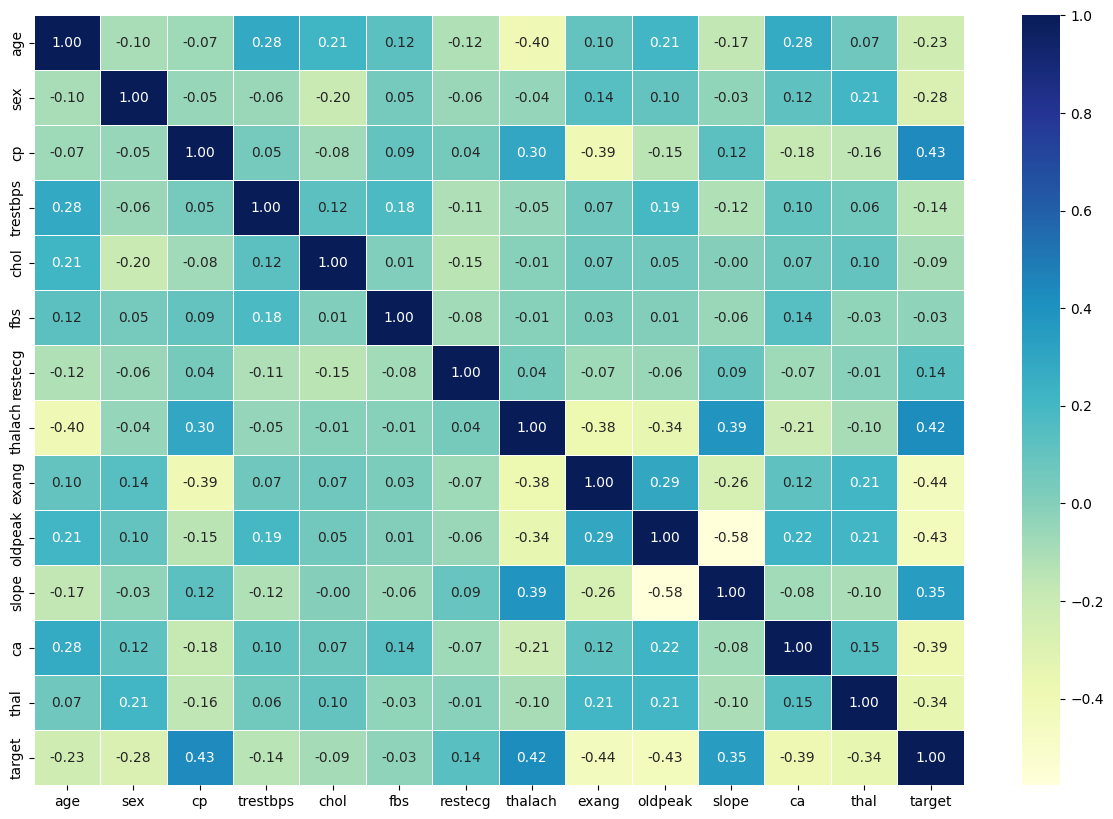

In [19]:
# Positive correlation means one variable increases, the other increases (in terms of its ratio)
# Negative correlation means one variable increases, the other decreases (in terms of its ratio)
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Modelling

In [20]:
np.random.seed(42)

X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RandomForest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        model_scores[name] = accuracy
    return model_scores

In [22]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

c:\users\yihim\onedrive\desktop\mldl\venvs\mldl\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

## Baseline Model comparison

,LogisticRegression,KNN,RandomForest
accuracy,0.885246,0.688525,0.836066


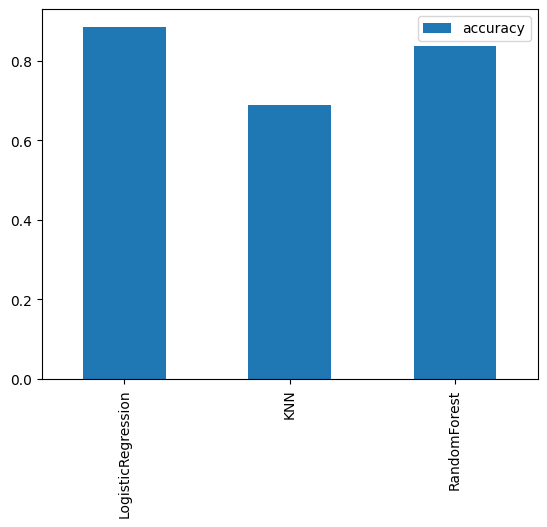

In [24]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
# The index always will be at the x-axis
model_compare

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (Manual)

In [25]:
training_scores = []
test_scores = []

neighbors = range(1,21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [26]:
training_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data: 75.41%


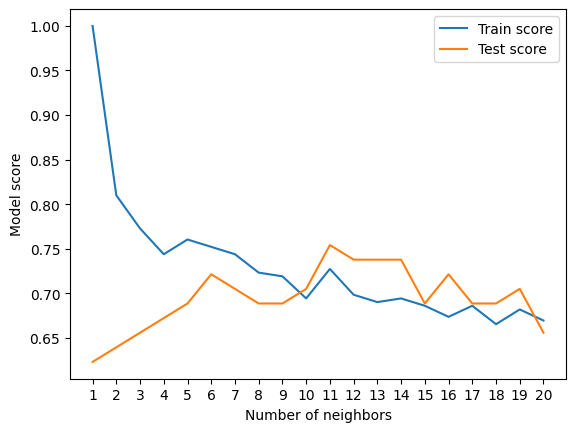

In [28]:
plt.plot(neighbors, training_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning (RandomizedSearchCV)

In [29]:
from scipy import stats

lr_grid = {"C": stats.uniform(0, 1),
           "max_iter": stats.randint(1000, 2000),
           "solver": ["liblinear"]}

rfc_grid = {"n_estimators": stats.randint(10, 1000),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": stats.uniform(0, 1),
            "min_samples_leaf": stats.randint(1, 20),
            "criterion": ["gini", "entropy", "log_loss"],
            "max_features": ["sqrt", "log2", None],
            "bootstrap": [True, False]}

In [30]:
np.random.seed(42)

lr = LogisticRegression()

lr_rs = RandomizedSearchCV(lr,
                           param_distributions=lr_grid,
                           cv=5,
                           n_iter=60,
                           verbose=True,
                           n_jobs=-1,
                           return_train_score=True)

lr_rs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=60, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BE4CA06F40>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE4CA21040>,
                                        'solver': ['liblinear']},
                   return_train_score=True, verbose=True)

In [31]:
lr_rs.score(X_test, y_test)

0.8852459016393442

In [32]:
lr_rs.best_params_

{'C': 0.19884240408880516, 'max_iter': 1391, 'solver': 'liblinear'}

In [33]:
np.random.seed(42)

rfc = RandomForestClassifier()

rfc_rs = RandomizedSearchCV(rfc,
                            param_distributions=rfc_grid,
                            cv=5,
                            n_iter=60,
                            verbose=True,
                            n_jobs=-1,
                            return_train_score=True,
                            refit=True)

rfc_rs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE4CA21790>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BE4CA213D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE4CA06E50>},
                   return_train_score=True, verbose=True)

In [34]:
rfc_rs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 0.45653457048291024,
 'n_estimators': 629}

In [35]:
rfc_rs.score(X_test, y_test)

0.8688524590163934

### Hyperparameter tuning (GridSearchCV)

In [36]:
np.random.seed(42)

lr_grid = {"C": np.logspace(-4, 4, 30),
           "solver": ["liblinear"]}

lr_gs = GridSearchCV(LogisticRegression(),
                     param_grid=lr_grid,
                     cv=5,
                     verbose=True)

lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
lr_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
lr_gs.score(X_test, y_test)

0.8852459016393442

In [39]:
lr_gs.score(X_train, y_train)

0.859504132231405

## Stratified K-Fold Cross Validation

In [40]:
np.random.seed(42)

skcv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_cv = cross_validate(LogisticRegression(**lr_gs.best_params_), 
                       X_train, 
                       y_train, 
                       scoring="accuracy", 
                       cv=skcv,
                       return_train_score=True)

In [41]:
lr_cv["test_score"].mean()

0.8264455782312925

In [42]:
lr_cv["test_score"].std()

0.027927427883569167

In [43]:
lr_cv["train_score"].mean()

0.8574541958228726

In [44]:
lr_cv["train_score"].std()

0.014312199509442078

In [45]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

cvs = cross_val_score(LogisticRegression(**lr_gs.best_params_), X_train, y_train, scoring="accuracy")

In [46]:
cvs.mean(), cvs.std()

(0.8305272108843538, 0.02058560895465711)

## Evaluating the tuned machine learning model

In [47]:
y_preds = lr_gs.predict(X_test)

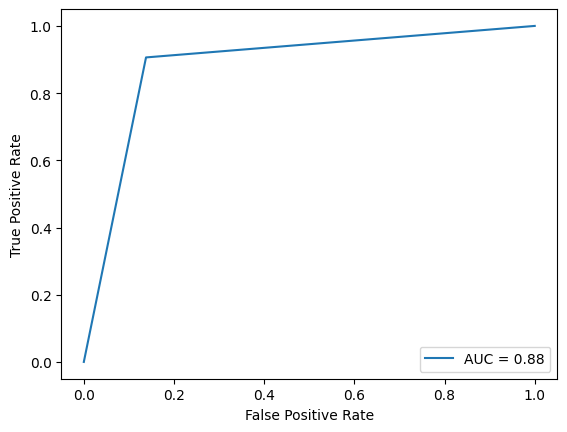

In [48]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
roc_auc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_auc_display.plot()

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

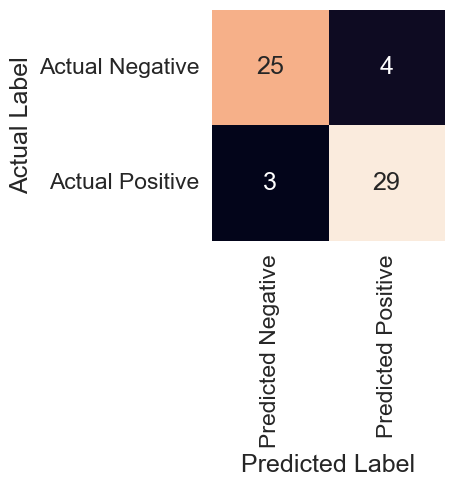

In [54]:
sns.set(font_scale=1.5)

def plot_cm(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(cm, annot=True, cbar=False,
                    xticklabels=["Predicted Negative", "Predicted Positive"],
                    yticklabels=["Actual Negative","Actual Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.xticks(rotation=90)

plot_cm(y_test, y_preds)

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [65]:
cv_pre = np.mean(cross_val_score(LogisticRegression(**lr_gs.best_params_), X_train, y_train, scoring="precision", cv=5))
cv_recall = np.mean(cross_val_score(LogisticRegression(**lr_gs.best_params_), X_train, y_train, scoring="recall", cv=5))
cv_f1 = np.mean(cross_val_score(LogisticRegression(**lr_gs.best_params_), X_train, y_train, scoring="f1", cv=5))
cv_acc = np.mean(cross_val_score(LogisticRegression(**lr_gs.best_params_), X_train, y_train, scoring="accuracy", cv=5))

In [66]:
cv_pre, cv_recall, cv_f1, cv_acc

(0.8156825852946541,
 0.8945868945868944,
 0.8527860395821953,
 0.8305272108843538)

<Axes: title={'center': 'Corss-validated classificaiton metrics'}>

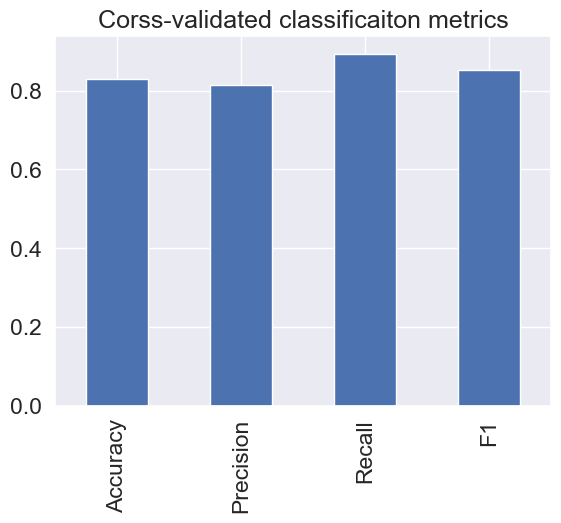

In [69]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Corss-validated classificaiton metrics", legend=False)

In [70]:
# Feature importance
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
lr_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
clf = LogisticRegression(**lr_gs.best_params_)
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [73]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [74]:
# Match the coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

<Axes: title={'center': 'Feature Importance'}>

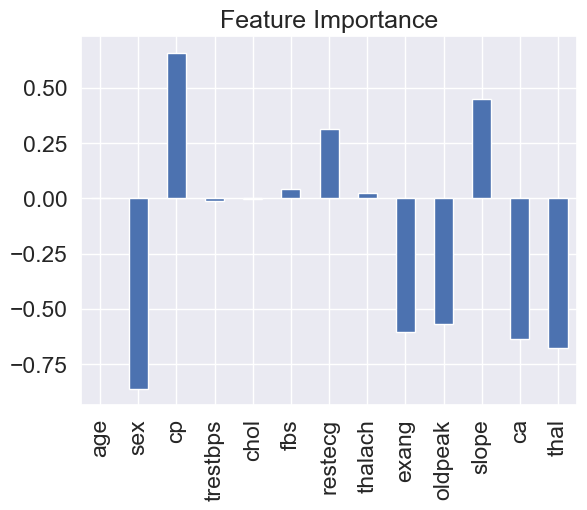

In [75]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

## Experimentation

If the evaluation metric is not reached...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you import the current models? Like using more hyperparameters

Else, export the model and share to others

In [76]:
from joblib import load, dump
dump(clf, filename="lr_heart_disease_model_v1.joblib")

['lr_heart_disease_model_v1.joblib']